In [1]:
import os
from utils import *
import optuna

In [2]:
data, usermap, itemmap, users = load_data2()
data_train, data_val=split_data2(data, 0.2)

In [3]:
rat_rank_study = optuna.create_study(
    study_name="rating+ranking",
    storage=get_database_url(),
    load_if_exists=True,
    direction="maximize",
)

[I 2024-01-06 16:33:49,684] A new study created in memory with name: rating+ranking


In [4]:
rp3beta_study = optuna.create_study(
    study_name="P3Beta",
    storage=get_database_url(),
    load_if_exists=True,
    direction="maximize",
)

[I 2024-01-06 16:33:49,705] A new study created in memory with name: P3Beta


In [5]:
from Recommenders.GraphBased.RP3betaRecommender import RP3betaRecommender

rp3beta_recommender = RP3betaRecommender(data_train, verbose=False)
rp3beta_recommender.fit(topK=35, alpha=0.3598110596257423, beta=0.1558338653772352, implicit=True, normalize_similarity=True)

_, _, ev_map, _, _ = evaluator(rp3beta_recommender, data_train, data_val)

#p3beta [topK: 35, alpha: 0.3598110596257423, beta: 0.1558338653772352, implicit: True, normalize_similarity: True]

In [6]:
easer_study = optuna.create_study(
    study_name="Easer",
    storage=get_database_url(),
    load_if_exists=True,
    direction="maximize",
)

[I 2024-01-06 16:34:01,878] A new study created in memory with name: Easer


In [7]:
from Recommenders.EASE_R.EASE_R_Recommender import EASE_R_Recommender

easer_recommender = EASE_R_Recommender(data_train)
easer_recommender.fit(topK=72, l2_norm=36.47305040353163)

_, _, ev_map, _, _ = evaluator(easer_recommender, data_train, data_val)

#easer [topK: 72, l2_norm: 36.47305040353163]

EASE_R_Recommender: URM Detected 227 ( 1.8%) users with no interactions.
EASE_R_Recommender: URM Detected 122 ( 0.5%) items with no interactions.
EASE_R_Recommender: Fitting model... 
EASE_R_Recommender: Fitting model... done in 6.08 min


In [8]:
user_id=50

In [9]:
rp3beta_score = rp3beta_recommender._compute_item_score(user_id).flatten()
rp3beta_score

array([0.        , 0.06261272, 0.        , ..., 0.        , 0.        ,
       0.        ])

In [10]:
easer_score = easer_recommender._compute_item_score(user_id).flatten()
easer_score

array([0.        , 0.05028891, 0.        , ..., 0.00663246, 0.        ,
       0.        ])

C:\Users\Francesco1\AppData\Local\Temp\ipykernel_6460\623488812.py:15: RuntimeWarning: divide by zero encountered in divide
  lminusinf_rp3beta_scores = rp3beta_score / lminusinf_rp3beta
C:\Users\Francesco1\AppData\Local\Temp\ipykernel_6460\623488812.py:15: RuntimeWarning: invalid value encountered in divide
  lminusinf_rp3beta_scores = rp3beta_score / lminusinf_rp3beta


[0.         0.06261272 0.         ... 0.         0.         0.        ] 0.2720212109376539 0.9742795424711641 0.2720212109376539 0.0


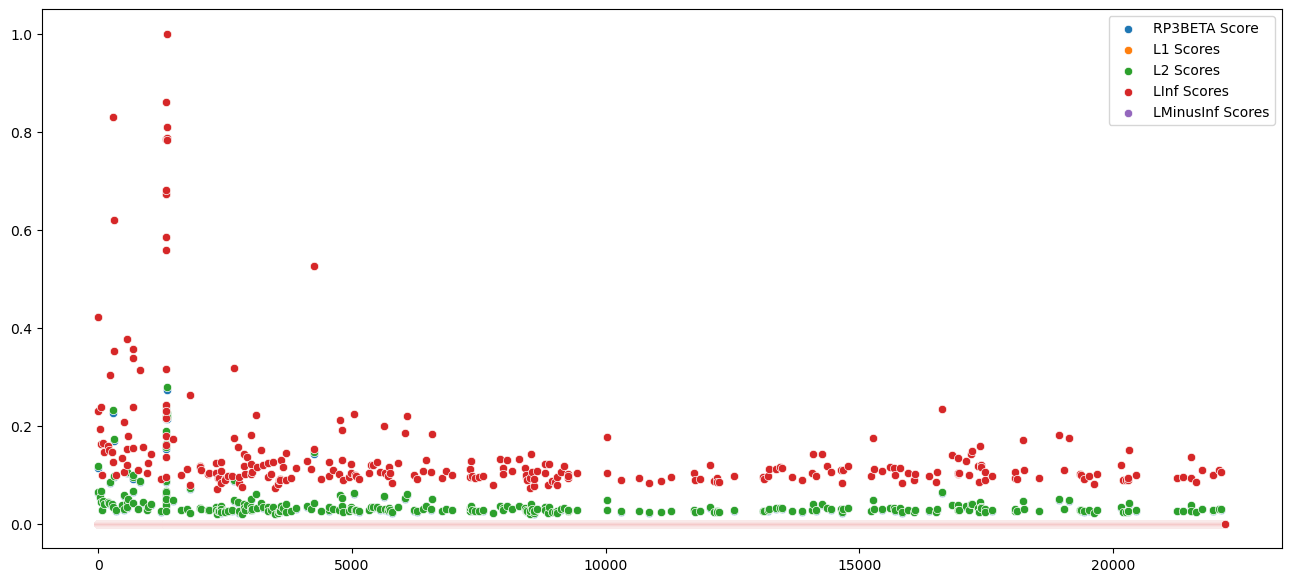

In [11]:
import seaborn as sns
from numpy import linalg as LA
import matplotlib.pyplot as plt

l1_rp3beta = LA.norm([rp3beta_score], 1)
l1_rp3beta_scores = rp3beta_score / l1_rp3beta

l2_rp3beta = LA.norm([rp3beta_score], 2)
l2_rp3beta_scores = rp3beta_score / l2_rp3beta

linf_rp3beta = LA.norm(rp3beta_score, np.inf)
linf_rp3beta_scores = rp3beta_score / linf_rp3beta

lminusinf_rp3beta = LA.norm(rp3beta_score, -np.inf)
lminusinf_rp3beta_scores = rp3beta_score / lminusinf_rp3beta

print(rp3beta_score, l1_rp3beta, l2_rp3beta, linf_rp3beta, lminusinf_rp3beta)

_ = plt.figure(figsize=(16,7))
ax = sns.scatterplot(data=rp3beta_score)
ax = sns.scatterplot(data=l1_rp3beta_scores) 
ax = sns.scatterplot(data=l2_rp3beta_scores) 
ax = sns.scatterplot(data=linf_rp3beta_scores) 
ax = sns.scatterplot(data=lminusinf_rp3beta_scores) 
ax.legend(["RP3BETA Score", "L1 Scores", "L2 Scores", "LInf Scores", "LMinusInf Scores"])

[0.         0.05028891 0.         ... 0.00663246 0.         0.        ] 34.770895047010605 1.407035899562398 0.49102181807694373 0.0


C:\Users\Francesco1\AppData\Local\Temp\ipykernel_6460\176586920.py:11: RuntimeWarning: divide by zero encountered in divide
  lminusinf_easer_scores = easer_score / lminusinf_easer
C:\Users\Francesco1\AppData\Local\Temp\ipykernel_6460\176586920.py:11: RuntimeWarning: invalid value encountered in divide
  lminusinf_easer_scores = easer_score / lminusinf_easer


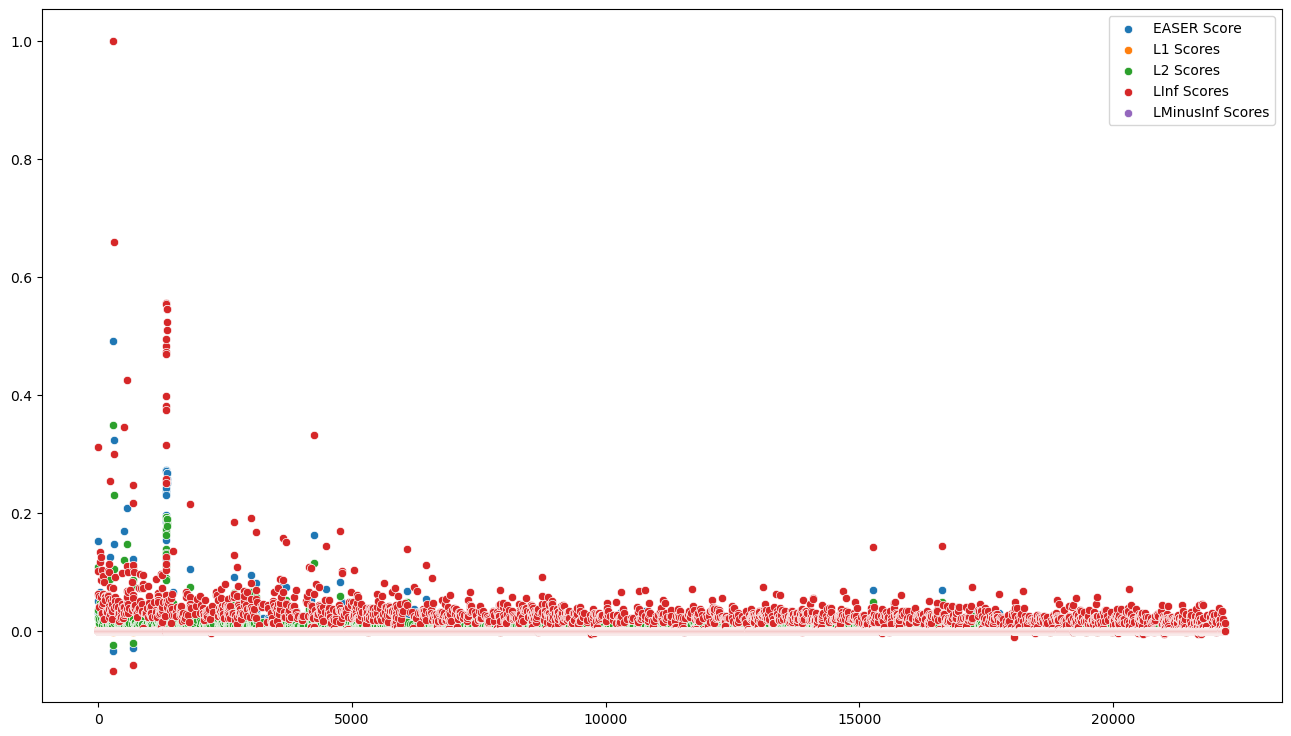

In [12]:
l1_easer = LA.norm(easer_score, 1)
l1_easer_scores = easer_score / l1_easer

l2_easer = LA.norm(easer_score, 2)
l2_easer_scores = easer_score / l2_easer

linf_easer = LA.norm(easer_score, np.inf)
linf_easer_scores = easer_score / linf_easer

lminusinf_easer = LA.norm(easer_score, -np.inf)
lminusinf_easer_scores = easer_score / lminusinf_easer

print(easer_score, l1_easer, l2_easer, linf_easer, lminusinf_easer)

_ = plt.figure(figsize=(16,9))
ax = sns.scatterplot(data=easer_score)
ax = sns.scatterplot(data=l1_easer_scores) 
ax = sns.scatterplot(data=l2_easer_scores) 
ax = sns.scatterplot(data=linf_easer_scores) 
ax = sns.scatterplot(data=lminusinf_easer_scores) 
ax.legend(["EASER Score", "L1 Scores", "L2 Scores", "LInf Scores", "LMinusInf Scores"])

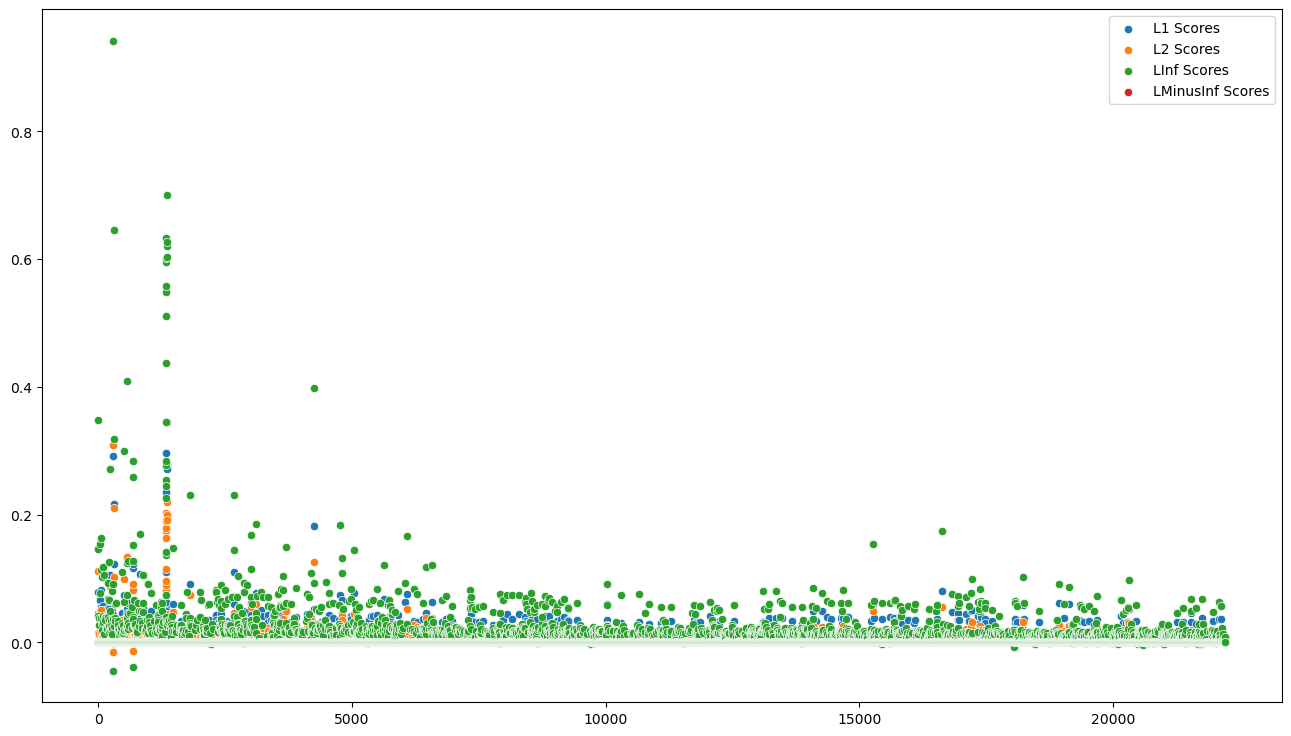

In [13]:
lambda_weights = 0.66

l1_new_scores = lambda_weights * l1_easer_scores + (1 - lambda_weights) * l1_rp3beta_scores
l2_new_scores = lambda_weights * l2_easer_scores + (1 - lambda_weights) * l2_rp3beta_scores
linf_new_scores = lambda_weights * linf_easer_scores + (1 - lambda_weights) * linf_rp3beta_scores
lminusinf_new_scores = lambda_weights * lminusinf_easer_scores + (1 - lambda_weights) * lminusinf_rp3beta_scores

_ = plt.figure(figsize=(16,9))
ax = sns.scatterplot(data=l1_new_scores)
ax = sns.scatterplot(data=l2_new_scores) 
ax = sns.scatterplot(data=linf_new_scores) 
ax = sns.scatterplot(data=lminusinf_new_scores) 
ax.legend(["L1 Scores", "L2 Scores", "LInf Scores", "LMinusInf Scores"])

In [14]:
from Recommenders.BaseRecommender import BaseRecommender
import scipy.sparse as sps

class DifferentLossScoresHybridRecommender(BaseRecommender):
    """ ScoresHybridRecommender
    Hybrid of two prediction scores R = R1/norm*alpha + R2/norm*(1-alpha) where R1 and R2 come from
    algorithms trained on different loss functions.

    """

    RECOMMENDER_NAME = "DifferentLossScoresHybridRecommender"


    def __init__(self, URM_train, recommender_1, recommender_2):
        super(DifferentLossScoresHybridRecommender, self).__init__(URM_train)

        self.URM_train = sps.csr_matrix(URM_train)
        self.recommender_1 = recommender_1
        self.recommender_2 = recommender_2
        
        
        
    def fit(self, norm, alpha = 0.5):

        self.alpha = alpha
        self.norm = norm


    def _compute_item_score(self, user_id_array, items_to_compute):
        
        item_weights_1 = self.recommender_1._compute_item_score(user_id_array)
        item_weights_2 = self.recommender_2._compute_item_score(user_id_array)

        norm_item_weights_1 = LA.norm(item_weights_1, self.norm)
        norm_item_weights_2 = LA.norm(item_weights_2, self.norm)
        
        
        if norm_item_weights_1 == 0:
            norm_item_weights_1 = 0.0000001
            #raise ValueError("Norm {} of item weights for recommender 1 is zero. Avoiding division by zero".format(self.norm))
        
        if norm_item_weights_2 == 0:
            norm_item_weights_2 = 0.0000001
            #raise ValueError("Norm {} of item weights for recommender 2 is zero. Avoiding division by zero".format(self.norm))
        
        item_weights = item_weights_1 / norm_item_weights_1 * self.alpha + item_weights_2 / norm_item_weights_2 * (1-self.alpha)

        return item_weights



In [15]:
def objective(trial):
    norm = trial.suggest_categorical("norm", [1, 2, np.inf, -np.inf])

    recommender_object = DifferentLossScoresHybridRecommender(data_train, rp3beta_recommender, easer_recommender)
    recommender_object.fit(
        norm = norm, 
        alpha = 0.66)

    _, _, ev_map, _, _ = evaluator(recommender_object, data_train, data_val)
    
    return ev_map

rat_rank_study.optimize(objective, n_trials=150)

DifferentLossScoresHybridRecommender: URM Detected 227 ( 1.8%) users with no interactions.
DifferentLossScoresHybridRecommender: URM Detected 122 ( 0.5%) items with no interactions.


[I 2024-01-06 16:43:43,661] Trial 0 finished with value: 0.0831440583149685 and parameters: {'norm': 2}. Best is trial 0 with value: 0.0831440583149685.


DifferentLossScoresHybridRecommender: URM Detected 227 ( 1.8%) users with no interactions.
DifferentLossScoresHybridRecommender: URM Detected 122 ( 0.5%) items with no interactions.


[I 2024-01-06 16:43:57,171] Trial 1 finished with value: 0.08319932177967308 and parameters: {'norm': 1}. Best is trial 1 with value: 0.08319932177967308.


DifferentLossScoresHybridRecommender: URM Detected 227 ( 1.8%) users with no interactions.
DifferentLossScoresHybridRecommender: URM Detected 122 ( 0.5%) items with no interactions.


[I 2024-01-06 16:44:10,448] Trial 2 finished with value: 0.08305802617346744 and parameters: {'norm': inf}. Best is trial 1 with value: 0.08319932177967308.


DifferentLossScoresHybridRecommender: URM Detected 227 ( 1.8%) users with no interactions.
DifferentLossScoresHybridRecommender: URM Detected 122 ( 0.5%) items with no interactions.


[I 2024-01-06 16:44:26,423] Trial 3 finished with value: 0.0831440583149685 and parameters: {'norm': 2}. Best is trial 1 with value: 0.08319932177967308.


DifferentLossScoresHybridRecommender: URM Detected 227 ( 1.8%) users with no interactions.
DifferentLossScoresHybridRecommender: URM Detected 122 ( 0.5%) items with no interactions.


[I 2024-01-06 16:44:42,699] Trial 4 finished with value: 0.0831440583149685 and parameters: {'norm': 2}. Best is trial 1 with value: 0.08319932177967308.


DifferentLossScoresHybridRecommender: URM Detected 227 ( 1.8%) users with no interactions.
DifferentLossScoresHybridRecommender: URM Detected 122 ( 0.5%) items with no interactions.


[I 2024-01-06 16:44:56,226] Trial 5 finished with value: 0.08319932177967308 and parameters: {'norm': 1}. Best is trial 1 with value: 0.08319932177967308.


DifferentLossScoresHybridRecommender: URM Detected 227 ( 1.8%) users with no interactions.
DifferentLossScoresHybridRecommender: URM Detected 122 ( 0.5%) items with no interactions.


[I 2024-01-06 16:45:09,473] Trial 6 finished with value: 0.08305802617346744 and parameters: {'norm': inf}. Best is trial 1 with value: 0.08319932177967308.


DifferentLossScoresHybridRecommender: URM Detected 227 ( 1.8%) users with no interactions.
DifferentLossScoresHybridRecommender: URM Detected 122 ( 0.5%) items with no interactions.


[I 2024-01-06 16:45:23,829] Trial 7 finished with value: 0.08305802617346744 and parameters: {'norm': inf}. Best is trial 1 with value: 0.08319932177967308.


DifferentLossScoresHybridRecommender: URM Detected 227 ( 1.8%) users with no interactions.
DifferentLossScoresHybridRecommender: URM Detected 122 ( 0.5%) items with no interactions.


[I 2024-01-06 16:45:39,469] Trial 8 finished with value: 0.08305802617346744 and parameters: {'norm': inf}. Best is trial 1 with value: 0.08319932177967308.


DifferentLossScoresHybridRecommender: URM Detected 227 ( 1.8%) users with no interactions.
DifferentLossScoresHybridRecommender: URM Detected 122 ( 0.5%) items with no interactions.


[I 2024-01-06 16:45:54,230] Trial 9 finished with value: 0.08305802617346744 and parameters: {'norm': -inf}. Best is trial 1 with value: 0.08319932177967308.


DifferentLossScoresHybridRecommender: URM Detected 227 ( 1.8%) users with no interactions.
DifferentLossScoresHybridRecommender: URM Detected 122 ( 0.5%) items with no interactions.


[W 2024-01-06 16:46:01,215] Trial 10 failed with parameters: {'norm': 1} because of the following error: KeyboardInterrupt().
Traceback (most recent call last):
  File "c:\Users\Francesco1\miniconda3\envs\RecSysFramework\lib\site-packages\optuna\study\_optimize.py", line 200, in _run_trial
    value_or_values = func(trial)
  File "C:\Users\Francesco1\AppData\Local\Temp\ipykernel_6460\3086007860.py", line 9, in objective
    _, _, ev_map, _, _ = evaluator(recommender_object, data_train, data_val)
  File "c:\Users\Francesco1\Desktop\rcs\utils.py", line 146, in evaluator
    recommendations = np.array(recommender.recommend(user_id,
  File "c:\Users\Francesco1\Desktop\rcs\Recommenders\BaseRecommender.py", line 147, in recommend
    scores_batch = self._compute_item_score(user_id_array, items_to_compute=items_to_compute)
  File "C:\Users\Francesco1\AppData\Local\Temp\ipykernel_6460\439342001.py", line 32, in _compute_item_score
    item_weights_2 = self.recommender_2._compute_item_score(use

KeyboardInterrupt: 

In [16]:
rat_rank_study.best_params

{'norm': 1}

In [17]:
recommender_object = DifferentLossScoresHybridRecommender(data_train, rp3beta_recommender, easer_recommender)
recommender_object.fit(**rat_rank_study.best_params)

DifferentLossScoresHybridRecommender: URM Detected 227 ( 1.8%) users with no interactions.
DifferentLossScoresHybridRecommender: URM Detected 122 ( 0.5%) items with no interactions.


In [ ]:
submission2(recommender_object, users, usermap, itemmap, data_train)

TopPopRecommender: URM Detected 218 ( 1.7%) users with no interactions.
TopPopRecommender: URM Detected 104 ( 0.5%) items with no interactions.
